# Plot maps in Python

In this notebook, I'll explore various ways to plot data points with `latitude` and `longitude` values on Maps using various libraries.

## Get the dataset

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('data/dataset.csv')

In [2]:
dataset.head(5)

,address,name,stars,longitude,postal_code,business_id,latitude,review_count,categories,city,is_open,hours,attributes,state
0,b'2818 E Camino Acequia Drive',b'Arizona Biltmore Golf Club',3.0,-112.018481,b'85016',b'1SWheh84yJXfytovILXOAQ',33.522143,5,"b'Golf, Active Life'",b'Phoenix',0,NaN,{'GoodForKids': 'False'},b'AZ'
1,b'30 Eglinton Avenue W',b'Emerald Chinese Restaurant',2.5,-79.652289,b'L5R 3E7',b'QXAEGFB4oINsVuTFxEYKFQ',43.605499,128,"b'Specialty Food, Restaurants, Dim Sum, Import...",b'Mississauga',1,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...","{'RestaurantsReservations': 'True', 'GoodForMe...",b'ON'
2,"b'10110 Johnston Rd, Ste 15'",b'Musashi Japanese Restaurant',4.0,-80.859132,b'28210',b'gnKjwL_1w79qoiV3IC_xQQ',35.092564,170,"b'Sushi Bars, Restaurants, Japanese'",b'Charlotte',1,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...","{'GoodForKids': 'True', 'NoiseLevel': ""u'avera...",b'NC'
3,"b'15655 W Roosevelt St, Ste 237'",b'Farmers Insurance - Paul Lorenz',5.0,-112.395596,b'85338',b'xvX2CttrVhyG2z1dFg_0xw',33.455613,3,"b'Insurance, Financial Services'",b'Goodyear',1,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",NaN,b'AZ'
4,"b'4209 Stuart Andrew Blvd, Ste F'",b'Queen City Plumbing',4.0,-80.887223,b'28217',b'HhyxOkGAM07SRYtlQ4wMFQ',35.190012,4,"b'Plumbing, Shopping, Local Services, Home Ser...",b'Charlotte',1,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",b'NC'


The latitude and lognitude values can be directly extracted from the respective columns.

In [82]:
latitudes = dataset.loc[:, 'latitude']
longitudes = dataset.loc[:, 'longitude']
min_latitude = latitudes.min()
max_latitude = latitudes.max()
min_longitude = longitudes.min()
max_longitude = longitudes.max()

## Gmplot

Using `gmplot` we can use Google Maps to plot the data and save the file as an HTML which we can then open in the browser. 

In [26]:
import gmplot 
  
gmap = gmplot.GoogleMapPlotter(35, -102, 5) 
gmap.scatter(latitudes[:1000], longitudes[:1000], 'red', size=10)
gmap.draw('data/map.html')

In [27]:
gmap.apikey = '###############' # Replace ############# with your API Key
gmap.draw('data/map.html')

Let's try to plot all the points in the dataset.

In [28]:
gmap.scatter(latitudes, longitudes, 'red', size=10)
gmap.draw('data/map.html')

Even though the `html` page was generated. Each time I tried to open it, it would load for a few seconds and then get unresponsive.

## Geopandas

In [154]:
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point
%matplotlib inline

In [230]:
data_points = [Point(xy) for xy in zip(longitudes, latitudes)]
states = dataset['state']
unqiue_states = states.unique()
colormap = cm.rainbow(np.linspace(0, 5, len(unqiue_states)))

colors = []
for i, state in enumerate(states):
    colors.append(colormap[np.where(unqiue_states == state)][0])

(23.204642003000004, 56.2999426916)

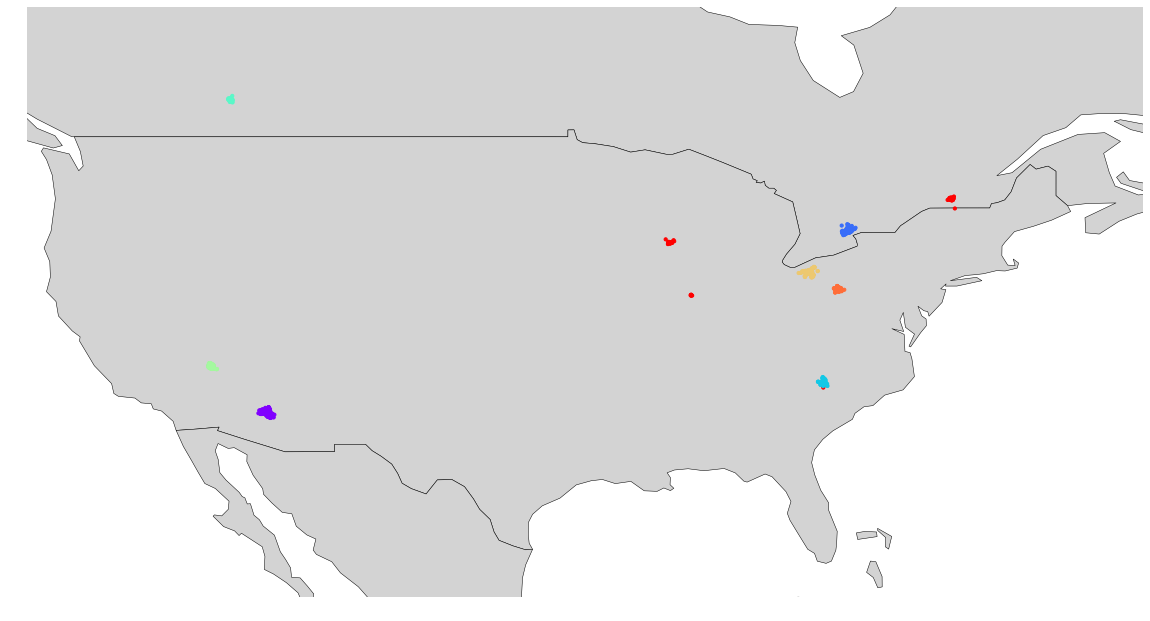

In [231]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df = gpd.GeoDataFrame(dataset.iloc[:1000,:], crs = {'init': 'epsg:4326'}, geometry = data_points[:1000])
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(20, 12))
geo_df.plot(markersize=10, c = colors[:1000], ax=ax)
ax.axis('off')
ax.set_xlim(min_longitude - 10, max_longitude + 10)
ax.set_ylim(min_latitude - 10, max_latitude + 5)

(23.204642003000004, 56.2999426916)

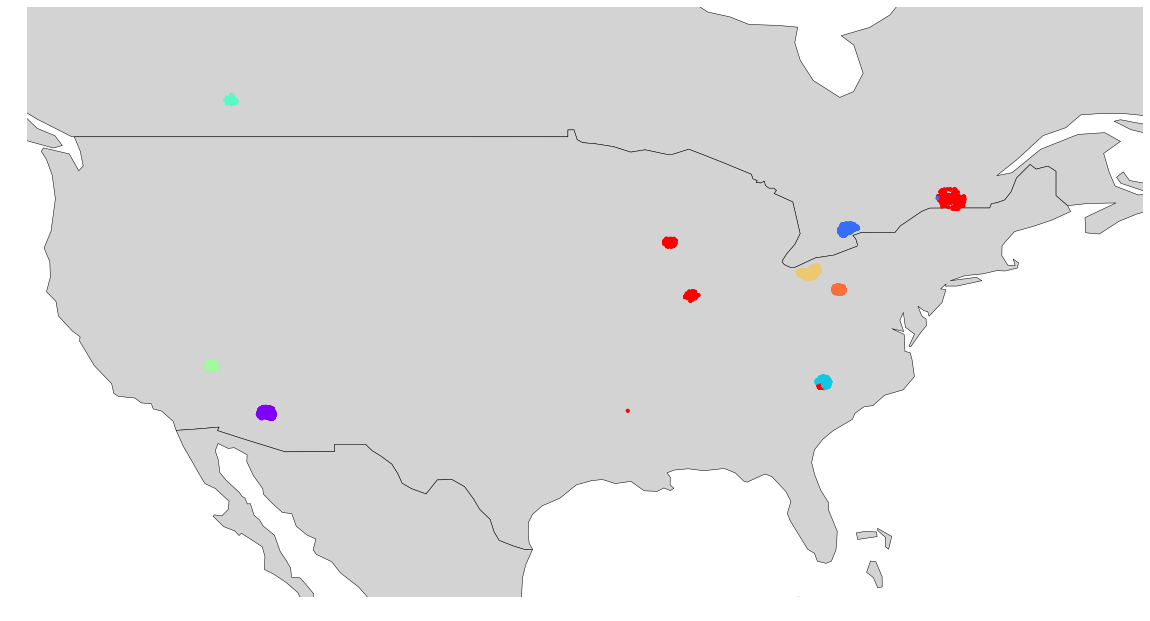

In [233]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_df = gpd.GeoDataFrame(dataset, crs = {'init': 'epsg:4326'}, geometry = data_points)
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='black', figsize=(20, 12))
geo_df.plot(markersize=10, c = colors, ax=ax)
ax.axis('off')
ax.set_xlim(min_longitude - 10, max_longitude + 10)
ax.set_ylim(min_latitude - 10, max_latitude + 5)

## Plotly

In [260]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='karanbhanot100', api_key='r0Zv72kvOXKIWgKCnPTe')
    
data = [ go.Scattergeo(
        locationmode = 'USA-states',
        lon = longitudes[:1000],
        lat = latitudes[:1000],
        text = names[:1000],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8
        ))]

layout = dict(
        title = 'Business locations', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='business' )

In [261]:
data = [ go.Scattergeo(
        locationmode = 'USA-states',
        lon = longitudes,
        lat = latitudes,
        text = names,
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8
        ))]

layout = dict(
        title = 'Business locations', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data=data, layout=layout )
py.iplot(fig, filename='business' )

While I was able to plot all the points, the rendering is very slow and any interaction takes a lot of time to respond.